In [0]:
# problem 1

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
df=pd.read_csv('svm.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
# exploratory data analysis
import pandas_profiling
prof = df.profile_report()
prof.to_file(output_file = "profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
# plots
sns.pairplot(df)
plt.savefig('plots.png')

<AxesSubplot:>

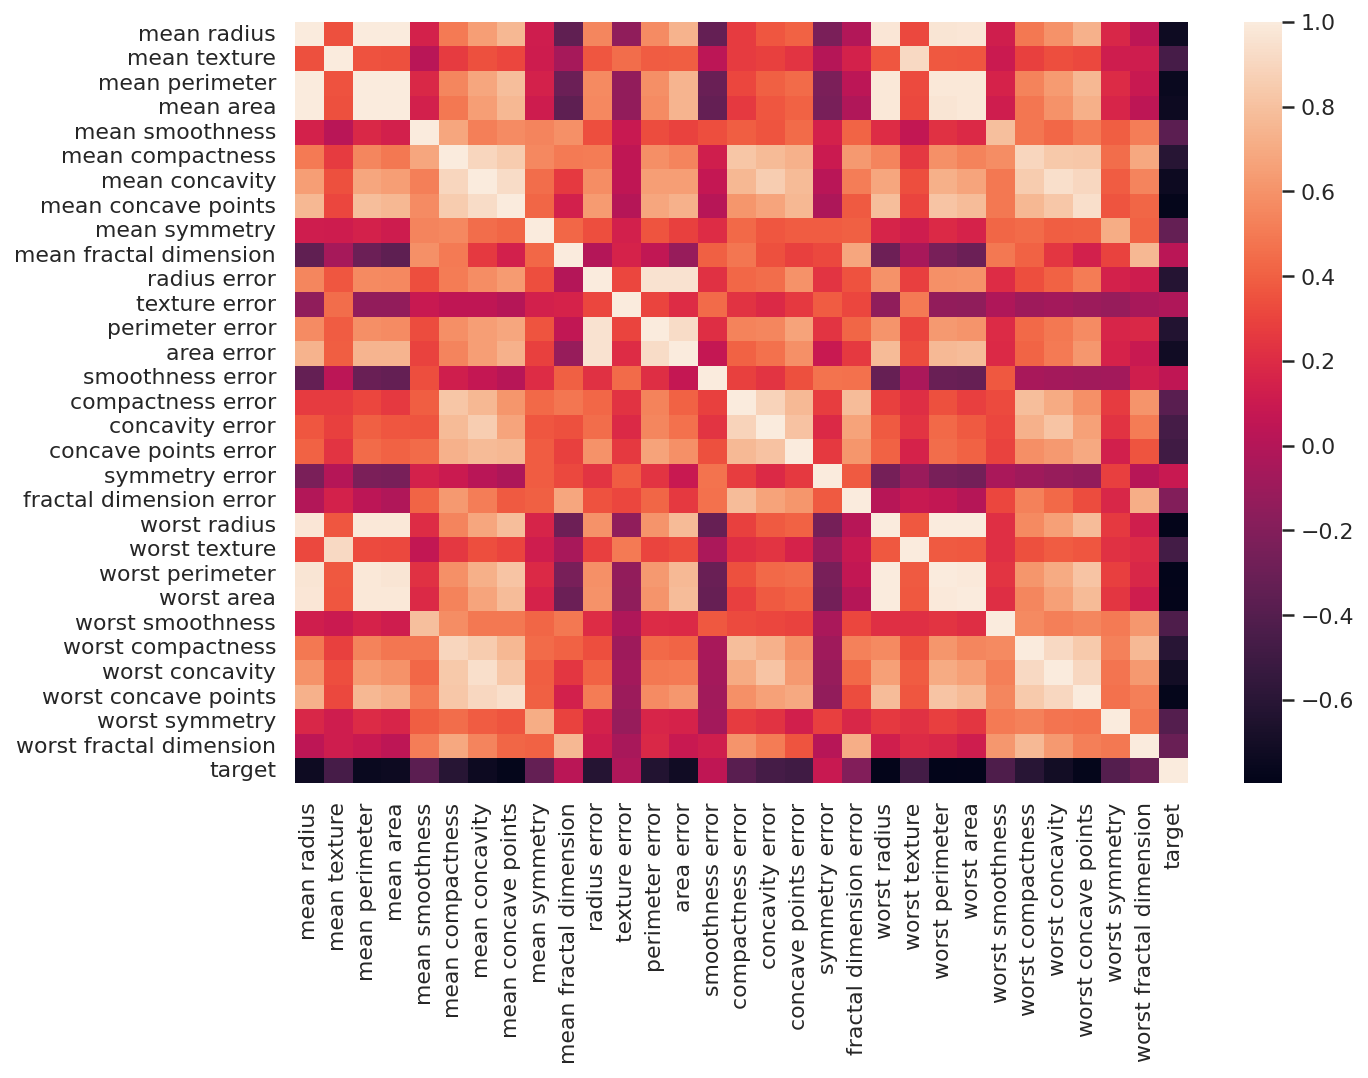

In [9]:
# heatmap
plt.figure(figsize=(10,7))
corr = df.corr(method = 'spearman')
sns.heatmap(corr)

In [6]:
# split into training and testing sets
features=['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension','radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error','worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']
X = df[features] # features
y = df.target # target value

from sklearn.preprocessing import StandardScaler # scale data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(StandardScaler().fit_transform(X),y,test_size=0.30,random_state=1)

In [72]:
# b

In [7]:
# fit linear support vector machine
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
model = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-3))
model.fit(X.values, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=0.001))])

In [8]:
#Predict train set
predicted= model.predict(X_train)
predicted

array([0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0.

In [9]:
# accuracy score train set
from sklearn import metrics
metrics.accuracy_score(predicted,y_train)

0.542713567839196

True positives:  106
False positives:  43
False negatives:  139
True negatives:  110


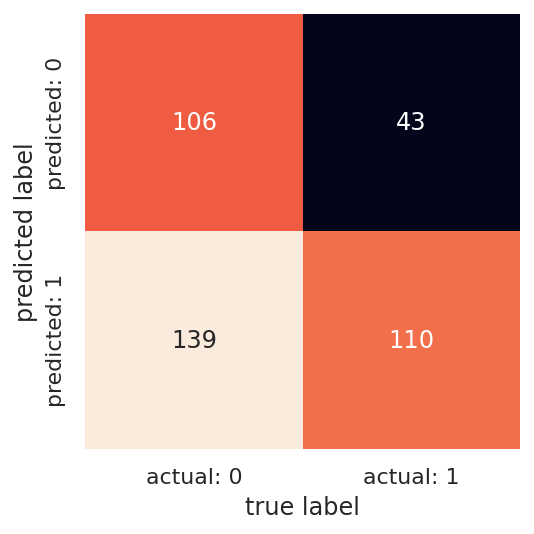

In [10]:
# confusion matrix train set
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_train, predicted)
print("True positives: ",mat[0,0])
print("False positives: ",mat[0,1])
print("False negatives: ",mat[1,0])
print("True negatives: ",mat[1,1])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['actual: 0','actual: 1'],
            yticklabels=['predicted: 0','predicted: 1'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
# classification report train set
from sklearn.metrics import classification_report
print(classification_report(y_train, predicted,
                            target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.43      0.71      0.54       149
        True       0.72      0.44      0.55       249

    accuracy                           0.54       398
   macro avg       0.58      0.58      0.54       398
weighted avg       0.61      0.54      0.54       398



In [78]:
#Predict test set
predicted= model.predict(X_test)
predicted

array([0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1.])

In [79]:
# accuracy score test set
metrics.accuracy_score(predicted,y_test)

0.5555555555555556

True positives:  43
False positives:  20
False negatives:  56
True negatives:  52


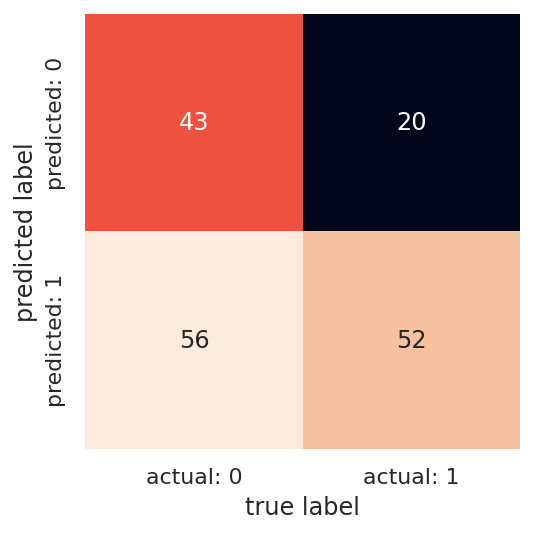

In [80]:
# confusion matrix test set
mat = confusion_matrix(y_test, predicted)
print("True positives: ",mat[0,0])
print("False positives: ",mat[0,1])
print("False negatives: ",mat[1,0])
print("True negatives: ",mat[1,1])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['actual: 0','actual: 1'],
            yticklabels=['predicted: 0','predicted: 1'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [81]:
# classification report test set
print(classification_report(y_test, predicted,
                            target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.43      0.68      0.53        63
        True       0.72      0.48      0.58       108

    accuracy                           0.56       171
   macro avg       0.58      0.58      0.55       171
weighted avg       0.62      0.56      0.56       171



In [82]:
# c

In [83]:
# fit polynomial support vector machine
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2).fit(X.values, y)

In [84]:
#Predict train set
predicted= model.predict(X_train)
predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [85]:
# accuracy score train set
metrics.accuracy_score(predicted,y_train)

0.6256281407035176

True positives:  0
False positives:  149
False negatives:  0
True negatives:  249


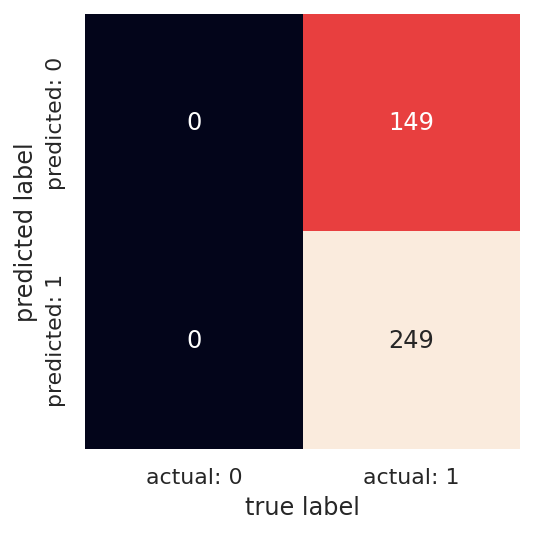

In [86]:
# confusion matrix train set
mat = confusion_matrix(y_train, predicted)
print("True positives: ",mat[0,0])
print("False positives: ",mat[0,1])
print("False negatives: ",mat[1,0])
print("True negatives: ",mat[1,1])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['actual: 0','actual: 1'],
            yticklabels=['predicted: 0','predicted: 1'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [87]:
# classification report train set
print(classification_report(y_train, predicted,
                            target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       149
        True       0.63      1.00      0.77       249

    accuracy                           0.63       398
   macro avg       0.31      0.50      0.38       398
weighted avg       0.39      0.63      0.48       398



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#Predict test set
predicted= model.predict(X_test)
predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [89]:
# accuracy score test set
metrics.accuracy_score(predicted,y_test)

0.631578947368421

True positives:  0
False positives:  63
False negatives:  0
True negatives:  108


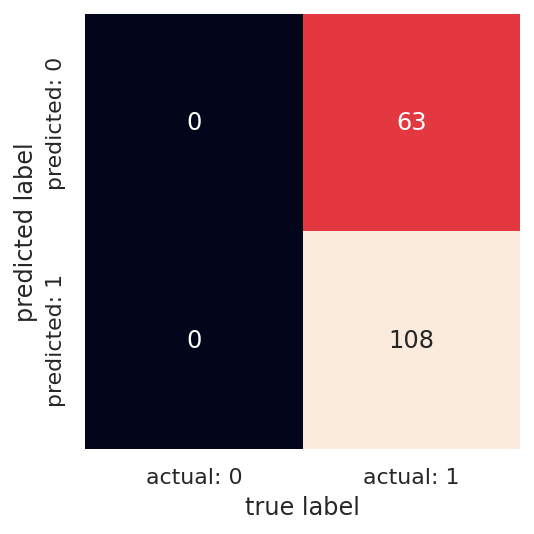

In [90]:
# confusion matrix test set
mat = confusion_matrix(y_test, predicted)
print("True positives: ",mat[0,0])
print("False positives: ",mat[0,1])
print("False negatives: ",mat[1,0])
print("True negatives: ",mat[1,1])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['actual: 0','actual: 1'],
            yticklabels=['predicted: 0','predicted: 1'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [91]:
# classification report test set
print(classification_report(y_test, predicted,
                            target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        63
        True       0.63      1.00      0.77       108

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
# d

In [93]:
# fit rbf support vector machine
model = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X.values, y)

In [94]:
#Predict train set
predicted= model.predict(X_train)
predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [95]:
# accuracy score train set
metrics.accuracy_score(predicted,y_train)

0.6256281407035176

True positives:  0
False positives:  149
False negatives:  0
True negatives:  249


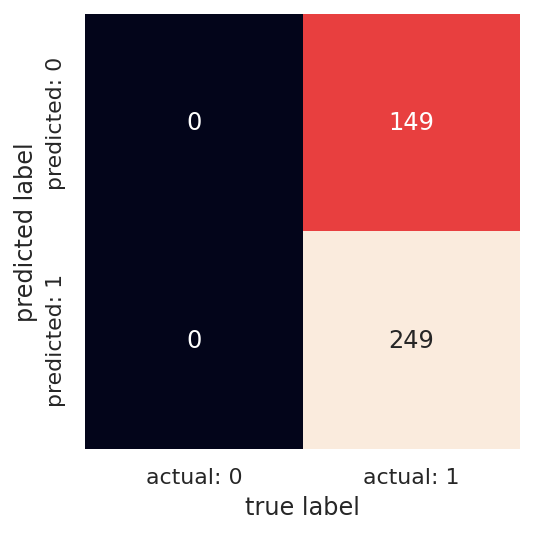

In [96]:
# confusion matrix train set
mat = confusion_matrix(y_train, predicted)
print("True positives: ",mat[0,0])
print("False positives: ",mat[0,1])
print("False negatives: ",mat[1,0])
print("True negatives: ",mat[1,1])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['actual: 0','actual: 1'],
            yticklabels=['predicted: 0','predicted: 1'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [97]:
# classification report train set
print(classification_report(y_train, predicted,
                            target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       149
        True       0.63      1.00      0.77       249

    accuracy                           0.63       398
   macro avg       0.31      0.50      0.38       398
weighted avg       0.39      0.63      0.48       398



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
#Predict test set
predicted= model.predict(X_test)
predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [99]:
# accuracy score test set
metrics.accuracy_score(predicted,y_test)

0.631578947368421

True positives:  0
False positives:  63
False negatives:  0
True negatives:  108


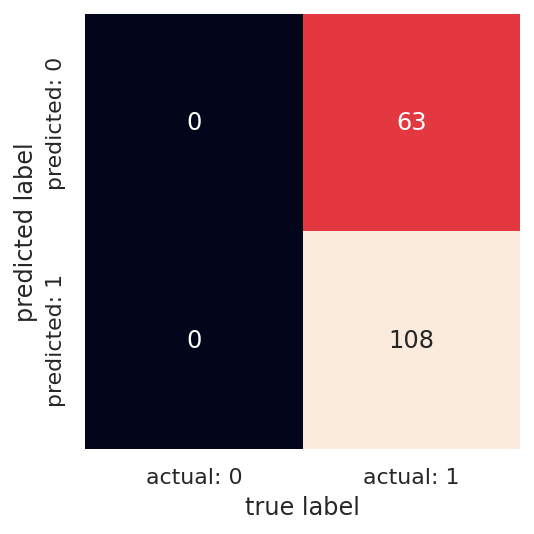

In [100]:
# confusion matrix test set
mat = confusion_matrix(y_test, predicted)
print("True positives: ",mat[0,0])
print("False positives: ",mat[0,1])
print("False negatives: ",mat[1,0])
print("True negatives: ",mat[1,1])
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['actual: 0','actual: 1'],
            yticklabels=['predicted: 0','predicted: 1'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [101]:
# classification report test set
print(classification_report(y_test, predicted,
                            target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        63
        True       0.63      1.00      0.77       108

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
# problem 2

In [2]:
df=pd.read_csv('decisionTree.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,target_class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [14]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df.buying=le.fit_transform(df["buying"])
df.maint=le.fit_transform(df["maint"])
df.doors=le.fit_transform(df["doors"])
df.persons=le.fit_transform(df["persons"])
df.lug_boot=le.fit_transform(df["lug_boot"])
df.safety=le.fit_transform(df["safety"])
df.target_class=le.fit_transform(df["target_class"])

df.head()

,buying,maint,doors,persons,lug_boot,safety,target_class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [16]:
# split data into training and testing sets

features = ['buying','maint','doors','persons','lug_boot','safety']
X = df[features] # features
y = df.target_class # target value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
# a

In [17]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

In [20]:
#training set accuracy 
predicted = model.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, predicted))

Accuracy: 0.7831125827814569


In [21]:
#testing set accuracy 
predicted = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.74373795761079


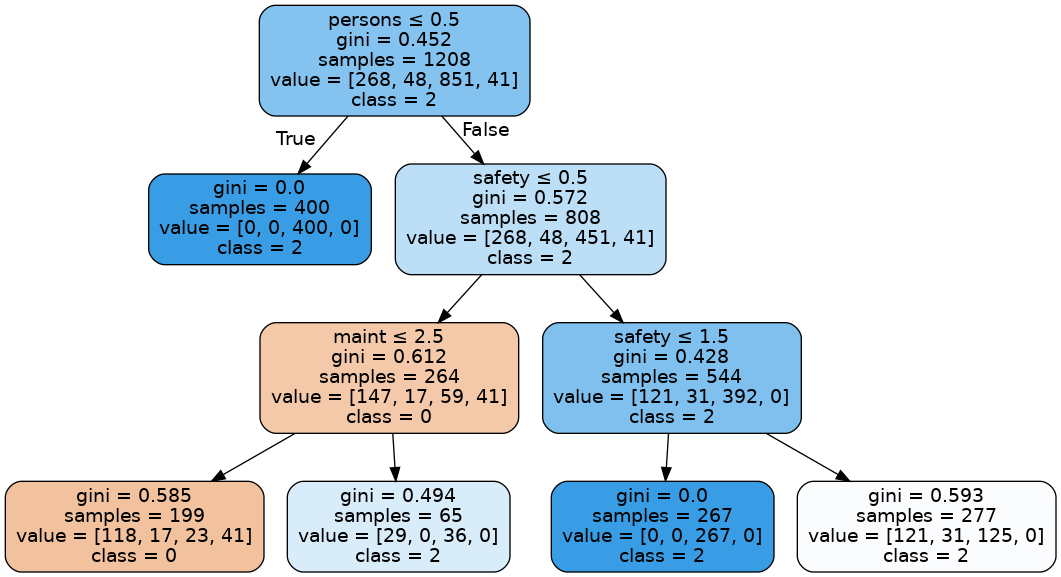

In [24]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [0]:
# b

In [25]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

In [26]:
#training set accuracy 
predicted = model.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, predicted))

Accuracy: 0.7831125827814569


In [27]:
#testing set accuracy 
predicted = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.74373795761079


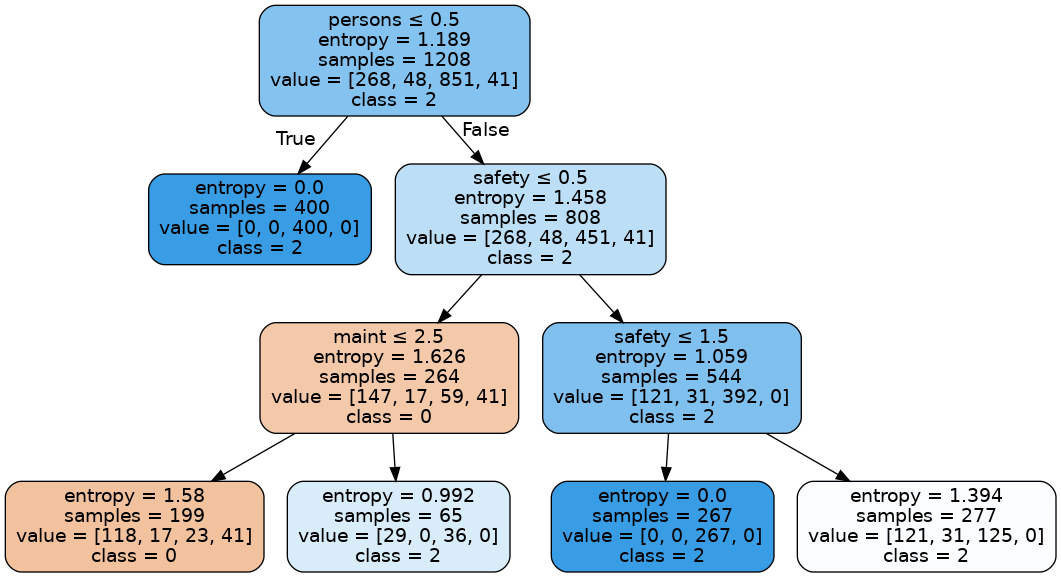

In [28]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())